# Linear regression with one variable

## Cost function intuition

In this case the hypothesis function is h(x) = seta * x , where seta and x are scalar values not vectors

### Example
we have three input samples 
<pre>
|   x  |   y  |
|------|------|
|   1  |   1  |
|   2  |   2  |
|   3  |   3  |
</pre>

The goal of this animation is to the relation between choosing value of seta and the cost (error) function defined by the equation: coast (error) function = mean square error    J(seta) = 1/2m * sum [(h(x) - y)2]

In [181]:
%matplotlib inline 

from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

from JSAnimation.IPython_display import display_animation
from matplotlib import animation


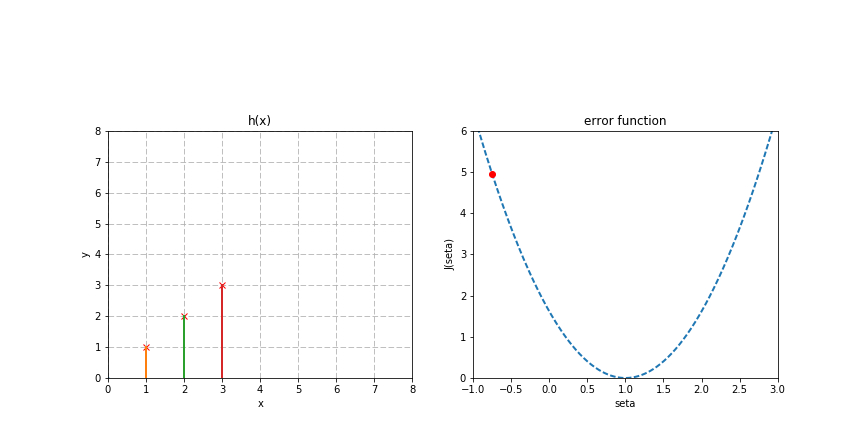
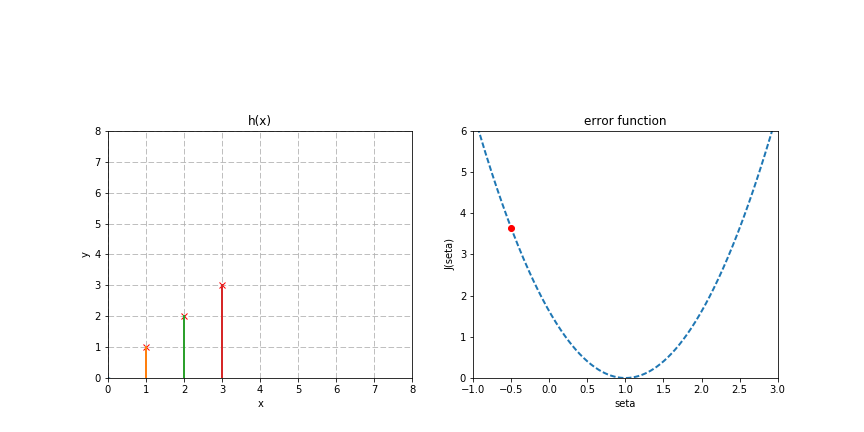
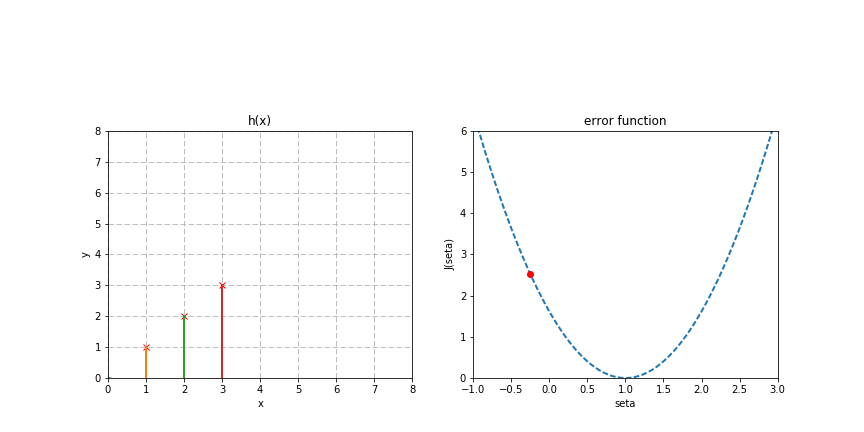
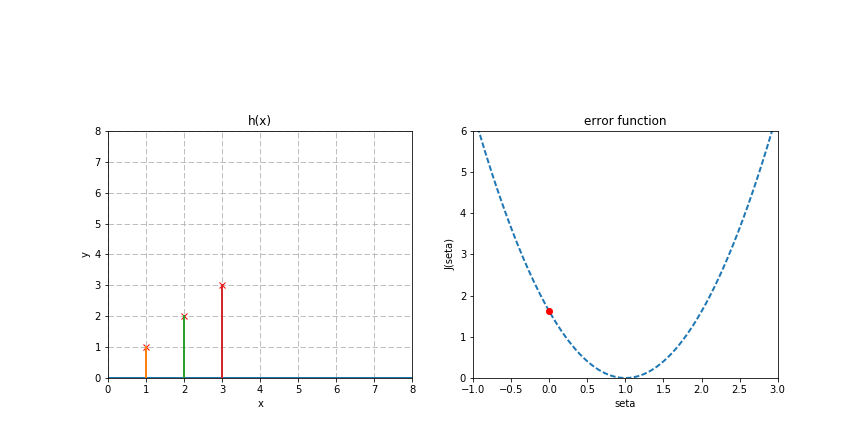
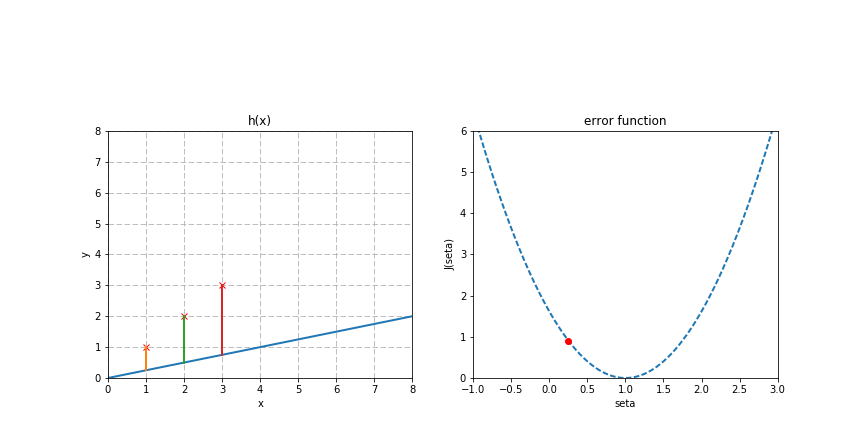
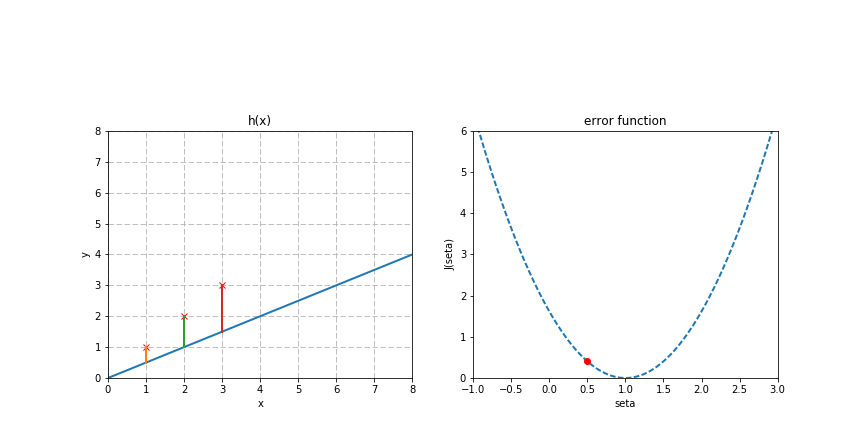
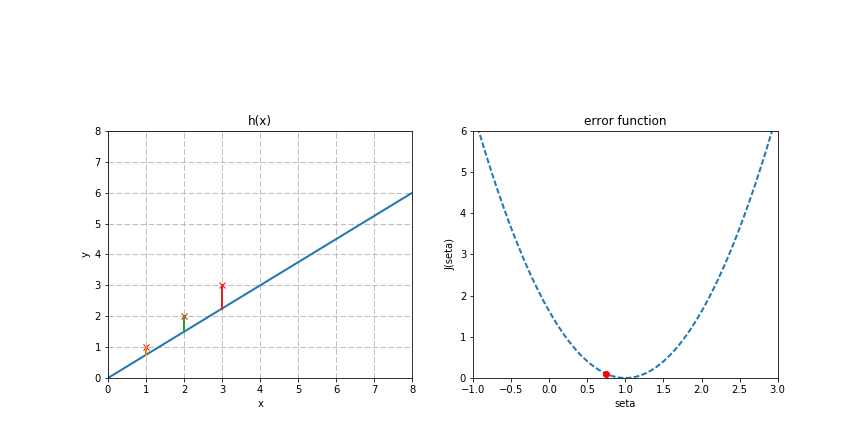
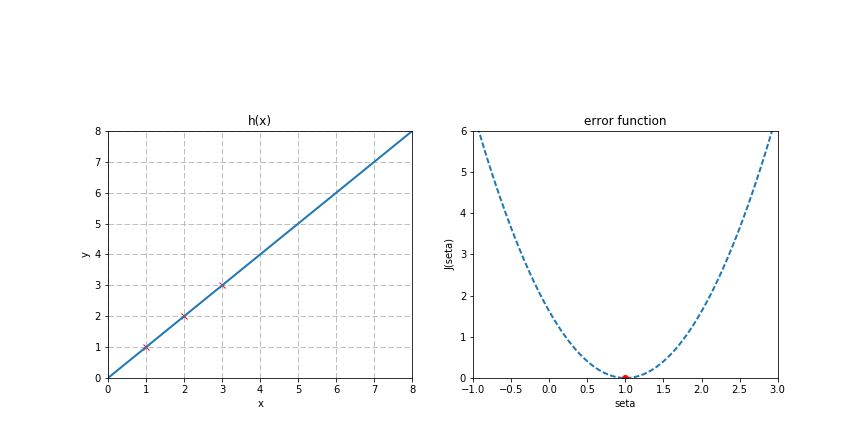
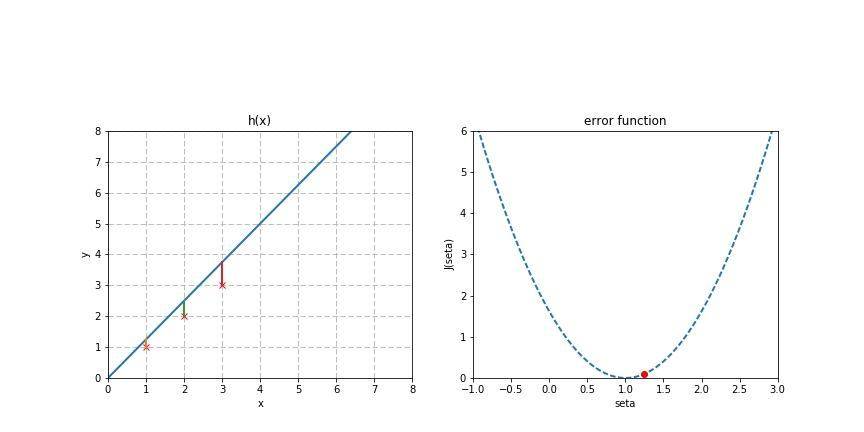
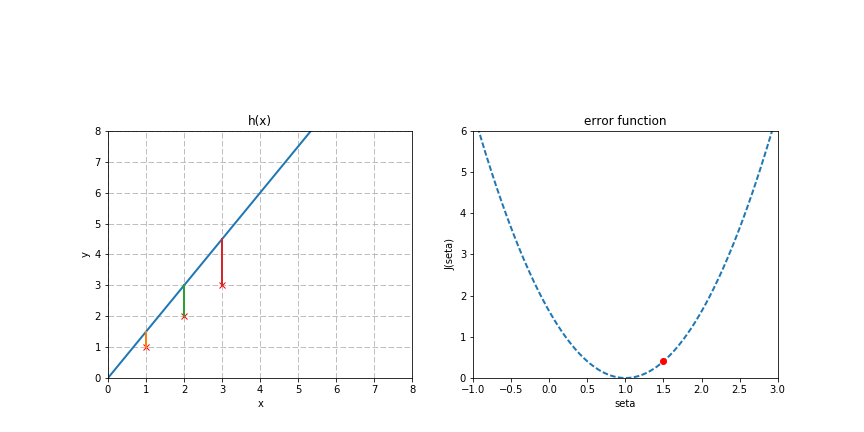
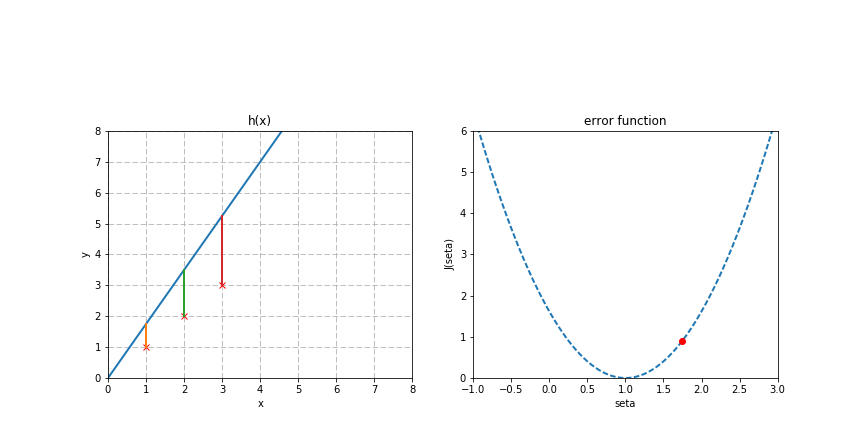
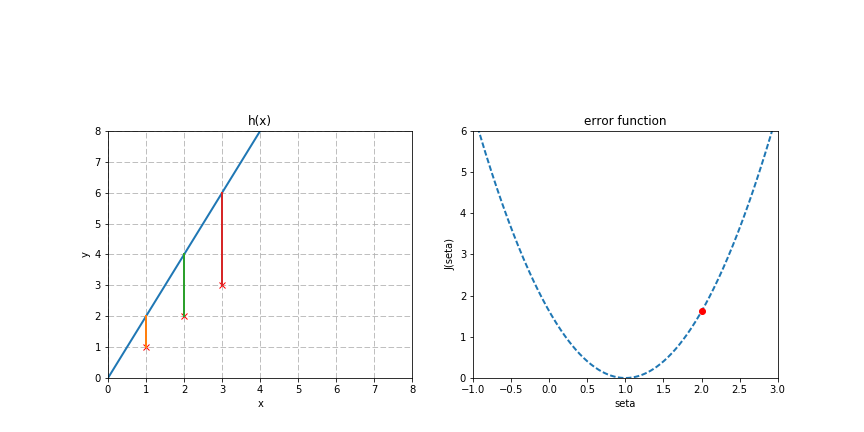
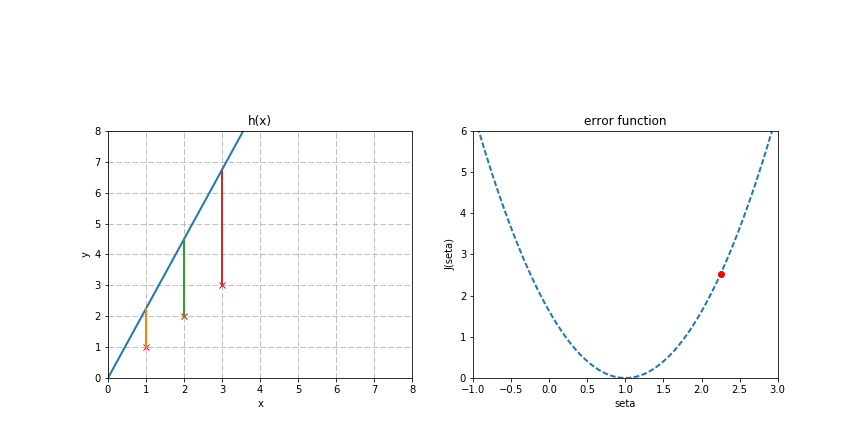
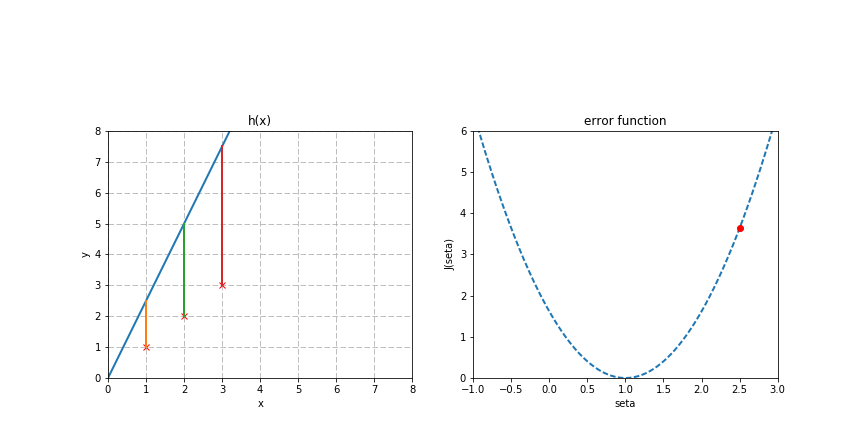
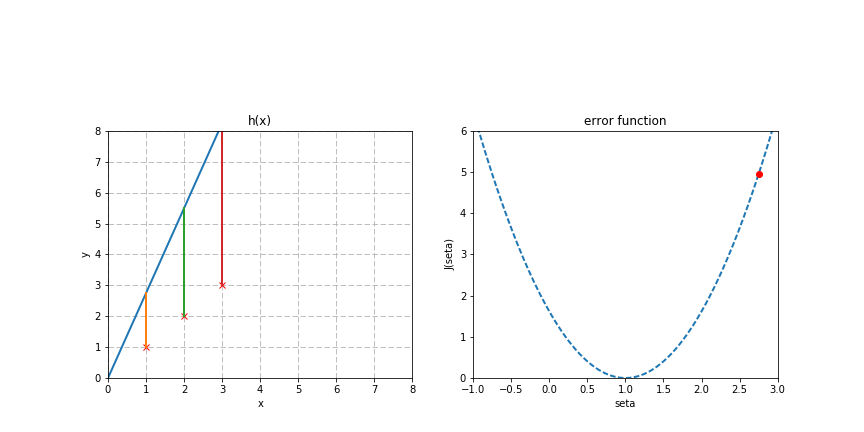

In [182]:
def error(seta):
    j = 0
    for num in nums:
        actual_y = num
        j += (seta * num - actual_y)**2
        j = j / 6
    return j

# create a simple animation
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1, 1],
                       height_ratios=[1, 5]
                       )
ax = plt.subplot(gs[2], xlim=(0, 8), ylim=(0, 8))
ax.grid(True, linestyle='--')
ax.plot([1 , 2 , 3], [1 , 2 , 3], 'rx')
line, = ax.plot([], [], lw=2)
line1, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)
line3, = ax.plot([], [], lw=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('h(x)')

ax2 = plt.subplot(gs[3], xlim=(-1, 3), ylim=(0, 6))
t = np.arange(-1, 3, 0.01)
s = error(t)
plt.plot(t, s, '--', lw=2)
point, = ax2.plot([], [], 'ro')
plt.xlabel('seta')
plt.ylabel('J(seta)')
plt.title('error function')

x = np.linspace(0, 10, 11)
seta = - 1
nums = [1, 2, 3]

def init():
    line.set_data([], [])
    line2.set_data([], [])
    point.set_data(1, 1)
    return line, line2, point,

def animate(i):
    global seta
    seta += 0.25    
    h = seta * x
    line.set_data(x, h)
    
    line1.set_data([1, 1], [1, h[1]])
    line2.set_data([2, 2], [2, h[2]])
    line3.set_data([3, 3], [3, h[3]])
    
    j = 0
    for num in nums:
        actual_y = num
        j += (seta * num - actual_y)**2
        j = j / 6
    point.set_data(seta, j)
    return line, line2, point,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=15, interval=50, blit=True)